In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
from scipy import stats
import pandas as pd
pd.set_option('max_rows', 6)

## 考えてみる
---
複数の変数 (データフレームのカラム) 間に関係がある (連動して動いていそう) かどうかを数値で表すとしたら、どのようなものがありそうか。

## GUIで実行してみる

### 質的データ (特に名義尺度) の場合
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- `データ` -> `データのインポート` -> `テキストファイルまたはクリップボード, URLから`

として、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。

`workspace/data/Titanic.csv`を読み込む。  
`データセットを表示`をクリックし、内容を確認。

- `統計量` -> `分割表` -> `2元表`

として`行の変数`に`Sex`、`列の変数`に`Survived`を選択して、`OK`をクリック。 

RStudio の Console に戻って、集計できていることを確かめる。

### 量的データ (順序尺度含む) の場合
---
RStudio の Console に`library(Rcmdr)`と入力して、 R commander を起動。

- データ -> データのインポート -> テキストファイルまたはクリップボード, URLから

として、`フィールドの区切り記号`を`カンマ`にし、`OK`をクリック。

`workspace/data/swiss.csv`を読み込む。  
`データセットを表示`をクリックし、内容を確認。

- `データ` -> `アクティブデータセット` -> `ケース名の設定`

として、`X`を選択し、再度データの内容を確認。

- `統計量` -> `要約` -> `相関行列`

として、全ての変数を選択し、`OK`をクリック。 

RStudio の Console から結果を確認。

## 変動係数 (coefficient of variation)
---
複数変数間での標準偏差の大きさを比較するために用いる。  
一般に平均が大きい変数は、小さい変数より標準偏差が大きくなるため、標準偏差を平均で割った変動係数で比較することがある。

変数 $x$ の変動係数は $\displaystyle CV( x) =\frac{S_{x}}{\overline{x}}$ で表される。

変動係数では、値同士の除算 (割り算) があるので、比率尺度の変数でなければ算出できない。

## クロス集計表 (cross-tabulation)
---
分割表ともいう。  
主に名義尺度のデータに対して用い、カテゴリごとのデータの偏りなどを確認する。

###### 練習問題

データフレームの任意のカラムを行・列に持つクロス集計表を作成する関数`cross_tabulation`を完成させる。

In [2]:
titanic = pd.read_csv('data/Titanic.csv')
titanic

,Class,Sex,Age,Survived
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
...,...,...,...,...
2199,Crew,Female,Adult,Yes
2200,Crew,Female,Adult,Yes
2201,Crew,Female,Adult,Yes


In [3]:
def cross_tabulation(index=None, columns=None, data=None):
    '''
    index: str
    columns: str
    data: Pandas DataFrame
    '''
    return

In [4]:
def cross_tabulation(index=None, columns=None, data=None):
    rows = np.sort(data[index].unique())
    cols = np.sort(data[columns].unique())
    result = pd.DataFrame(index=rows, columns=cols)
    for r in rows:
        for c in cols:
            result.loc[r, c] = ((data[index] == r) & (data[columns] == c)).sum()
    return result

In [5]:
print('結果')
display(cross_tabulation(index='Class', columns='Age', data=titanic))
print('正解')
display(pd.crosstab(index=titanic['Class'], columns=titanic['Age']))

結果


,Adult,Child
1st,319,6
2nd,261,24
3rd,627,79
Crew,885,0


正解


Age,Adult,Child
Class,,
1st,319,6
2nd,261,24
3rd,627,79
Crew,885,0


### Pythonでのクロス集計表作成
---
`pandas.crosstab`を用いる。

In [6]:
pd.crosstab??

`margins`引数で集計、`normalize`引数で行方向・列方向ごとの割合を表示できる。

In [7]:
pd.crosstab(titanic['Class'], titanic['Age'], margins=True)

Age,Adult,Child,All
Class,,,
1st,319,6,325
2nd,261,24,285
3rd,627,79,706
Crew,885,0,885
All,2092,109,2201


In [8]:
pd.crosstab(titanic['Class'], titanic['Age'], margins=True, normalize='index')

Age,Adult,Child
Class,,
1st,0.981538,0.018462
2nd,0.915789,0.084211
3rd,0.888102,0.111898
Crew,1.000000,0.000000
All,0.950477,0.049523


## 相関係数 (correlation coefficient)
---
変数同士の**線形 (単純比例) な関係の度合い**を数値化したもの。 $-1\sim 1$ の間の値をとる。

In [9]:
from helpers.correlation_coefficient import correlation
correlation.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='相関係数 (目安)', max=1.0, min=-1…

相関係数はあくまで線形な関係のみを捉えるので、変数同士に関係があっても、その関係が**非線形な場合は捉えられない**。

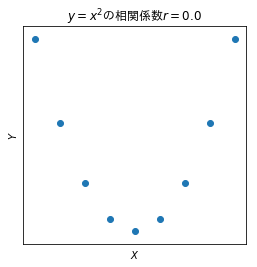

In [10]:
from helpers.correlation_coefficient import non_linear
non_linear.show()

### ピアソンの積率相関係数
---
相関係数というと一般にこれを指す。  
**量的変数 (間隔尺度・比率尺度) 同士**の相関関係を表すのに用いる。

以下のようなデータがあるとする。

|変数$x$|変数$y$|
|:-:|:-:|
|$x_{1}$|$y_{1}$|
|$x_{2}$|$y_{2}$|
|$\vdots$|$\vdots$|
|$x_{n}$|$y_{n}$|

変数 $x,y$ の相関係数 $r_{xy}$ は、共分散 $
\displaystyle Cov( x,y) =\frac
    {1}
    {n}
\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)
$ 、標準偏差 $
\displaystyle S( x) =\sqrt{
    {\displaystyle \frac
        {1}
        {n}
    \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}
} ,S( y) =\sqrt{
    {\displaystyle \frac
        {1}
        {n}
    \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}
}
$ とすると

$
\begin{align}
    r_{xy} & =\frac
        {Cov( x,y)}
        {S( x) S( y)}\\
     & \\
     & =\frac
         {{\displaystyle \frac
             {1}
             {n}
         \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)}}
         {S( x) S( y)}\\
     & \\
     & =\frac
         {1}
         {n}
     \sum ^{n}_{i=1}\left(\frac
         {x_{i} -\overline{x}}
         {S( x)}
     \right)\left(\frac
         {y_{i} -\overline{y}}
         {S( y)}
     \right)\\
     & \\
     & =\frac
         {{\displaystyle \frac
             {1}
             {n}
         \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)}}
         {\sqrt
             {{\displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}
             }}
         \sqrt
             {{\displaystyle \frac
                 {1}
                 {n}
             \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}}
         }\\
     & \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)}}
         {\sqrt
             {{\displaystyle \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}}}
         \sqrt
             {{\displaystyle \sum ^{n}_{i=1}\left( y_{i} -\overline{y}\right)^{2}}}
         }
\end{align}
$

で表される。

#### 共分散
---
1変数 $x$ の分散は

$
\begin{align}
    V( x) & =\frac
        {1}
        {n}
    \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)^{2}\\
     & =\frac
         {1}
         {n}
     \sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( x_{i} -\overline{x}\right)
\end{align}
$

で表される。  
これを2変数 $x,y$ に拡張したのが共分散で

$
\displaystyle Cov( x,y) =\frac
    {1}
    {n}
\sum ^{n}_{i=1}\left( x_{i} -\overline{x}\right)\left( y_{i} -\overline{y}\right)
$

で表される。

###### 練習問題

2変数の相関係数を算出する`correlation_coefficient`を完成させる。

In [11]:
np.random.seed(1234)
r = 0.7
mat = np.array([
    [1.0, r],
    [r, 1.0]
])
data = pd.DataFrame(np.random.multivariate_normal(np.zeros(2), mat, size=100), columns=['x', 'y'])
data

,x,y
0,0.026621,-0.895905
1,-1.199801,-1.441980
2,0.320753,1.007947
...,...,...
97,-0.851023,-1.185300
98,-0.195808,0.492930
99,0.141389,-0.673130


In [12]:
def correlation_coefficient(x, y):
    return

In [13]:
def correlation_coefficient(x, y):
    cov = ((x - x.mean()) * (y - y.mean())).mean()
    sx = np.sqrt(((x - x.mean()) ** 2).mean())
    sy = np.sqrt(((y - y.mean()) ** 2).mean())
    return cov / sx / sy

In [14]:
x, y = data['x'], data['y']
print(f'結果: {correlation_coefficient(x, y):.2f}')
print('正解' if np.isclose(
    np.corrcoef(x, y)[0, 1], correlation_coefficient(x, y)) else '不正解')

結果: 0.60
正解


#### Pythonでのピアソンの相関係数算出
---
`numpy.corrcoef`、`scipy.stats.pearsonr`、`pandas.DataFrame.corr`のいずれかを用いる。

In [15]:
np.corrcoef??

In [16]:
np.corrcoef(x, y)[0, 1]

0.5991408981594614

In [17]:
stats.pearsonr??

In [18]:
stats.pearsonr(x, y)[0]

0.5991408981594614

In [19]:
pd.DataFrame.corr??

In [20]:
data.corr().iloc[0, 1]

0.5991408981594616

### スピアマンの順位相関係数
---
**順序尺度**の変数に対して用いる。

#### *導出*

変数 $x$ の値 $x_{1},x_{2},\cdots ,x_{n}$ それぞれの変数内での順位を $j_{1},j_{2},\cdots ,j_{n}$ 、同様に変数 $y$ の値の変数内での順位を $k_{1},k_{2},\cdots ,k_{n}$ とすると、

$
\displaystyle \sum ^{n}_{i=1} j_{i} =\sum ^{n}_{i=1} k_{i} =\frac
    {n( n+1)}
    {2}
$

$
\displaystyle \sum ^{n}_{i=1} j^{2}_{i} =\sum ^{n}_{i=1} k^{2}_{i} =\frac
    {n( n+1)( 2n+1)}
    {6}
$

$
\displaystyle \overline{j} =\overline{k} =\frac
    {n+1}
    {2}
$

より、順位を用いた相関係数は

$
\begin{align}
    r_{jk} & =\frac
        {{\displaystyle \sum ^{n}_{i=1}\left( j_{i} -\overline{j}\right)\left( k_{i} -\overline{k}\right)}}
        {\sqrt{
            {\displaystyle \sum ^{n}_{i=1}\left( j_{i} -\overline{j}\right)^{2}}
        }\sqrt{
            {\displaystyle \sum ^{n}_{i=1}\left( k_{i} -\overline{k}\right)^{2}}
        }}\\
     & \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1}\left( j_{i} -\overline{j}\right)\left( k_{i} -\overline{k}\right) +\frac
             {1}
             {2}
         \sum ^{n}_{i=1}( j_{i} -k_{i})^{2} -\frac
             {1}
             {2}
         \sum ^{n}_{i=1}( j_{i} -k_{i})^{2}}}
         {\sqrt{
             {\displaystyle \sum ^{n}_{i=1} j^{2}_{i} -2\overline{j}\sum ^{n}_{i=1} j_{i} +\sum ^{n}_{i=1}\overline{j}^{2}}
         }\sqrt{
             {\displaystyle \sum ^{n}_{i=1} k^{2}_{i} -2\overline{k}\sum ^{n}_{i=1} k_{i} +\sum ^{n}_{i=1}\overline{k}^{2}}
         }}\\
     & \\
     & =\frac
         {{\displaystyle \sum ^{n}_{i=1} j_{i} k_{i} -\overline{k}\sum ^{n}_{i=1} j_{i} -\overline{j}\sum ^{n}_{i=1} k_{i} +n\left(\frac
             {n+1}
             {2}
         \right)^{2} +\frac
             {1}
             {2}
         \sum ^{n}_{i=1} j^{2}_{i} -\sum ^{n}_{i=1} j_{i} k_{i} +\frac
             {1}
             {2}
         \sum ^{n}_{i=1} k^{2}_{i} -\frac
             {1}
             {2}
         \sum ^{n}_{i=1}( j_{i} -k_{i})^{2}}}
         {{\displaystyle \frac
             {n( n+1)( 2n+1)}
             {6}
         -2\cdot \frac
             {n+1}
             {2}
         \cdot \frac
             {n( n+1)}
             {2}
         +n\left(\frac
             {n+1}
             {2}
         \right)^{2}}}\\
     & \\
     & =\frac
         {{\displaystyle n\left( n^{2} -1\right) -6\sum ^{n}_{i=1}( j_{i} -k_{i})^{2}}}
         {n\left( n^{2} -1\right)}\\
     & \\
     & =1-\frac
         {{\displaystyle 6\sum ^{n}_{i=1}( j_{i} -k_{i})^{2}}}
         {n\left( n^{2} -1\right)}
\end{align}
$

で表される。

###### *参考*

$
\displaystyle \sum ^{n}_{i=1} i^{2} =\frac
    {1}
    {6}
n( n+1)( 2n+1)
$ の求め方

$\displaystyle ( i+1)^{3} -i^{3} =3i^{2} +3i+1$ より

$
\begin{align}
2^{3} -1^{3} & =3*1^{2} +3*1+1\\
3^{3} -2^{3} & =3*2^{2} +3*2+1\\
 & \vdots \\
( n+1)^{3} -n^{3} & =3*n^{2} +3*n+1
\end{align}
$

全てを足し合わせて

$
\begin{align}
    ( n+1)^{3} -1 & =3\sum ^{n}_{i=1} i^{2} +3\sum ^{n}_{i=1} i+n\\
    ( n+1)^{3} -1 & =3\sum ^{n}_{i=1} i^{2} +3\times \frac
        {n( n+1)}
        {2}
    +n\\
    \sum ^{n}_{i=1} i^{2} & =\frac
        {1}
        {6}
    n( n+1)( 2n+1)
\end{align}
$

#### Pythonでのスピアマンの順位相関係数算出
---
`scipy.stats.spearmanr`または`pandas.DataFrame.corr`を用いる。

In [21]:
stats.spearmanr??

In [22]:
stats.spearmanr(x, y)[0]

0.5648604860486047

In [23]:
pd.DataFrame.corr??

In [24]:
data.corr(method='spearman').iloc[0, 1]

0.5648604860486048

### その他の相関係数
---
他にもケンドールの順位相関係数やポリコリック相関係数・ポリシリアル相関係数などがあるが、まずは上記2つを押さえておけばよい。